# Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Importing Necessary Libarires

In [53]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [54]:
train_df=pd.read_csv('Data_Train.csv')
test_df=pd.read_csv('Test_set.csv')
sample_file=pd.read_csv('Sample_submission.csv')

In [55]:
train_df.shape,test_df.shape,sample_file.shape

((10683, 11), (2671, 10), (1987, 1))

In [56]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [57]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
sample_file.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


# Data Wrangling

In [59]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [61]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [62]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [63]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

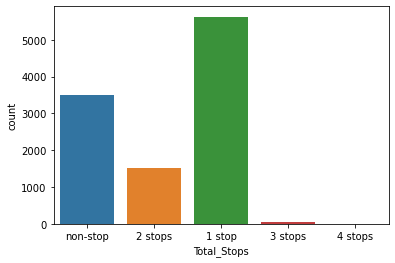

In [64]:
sns.countplot(train_df['Total_Stops'])

In [65]:
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
3h 25m       1
5m           1
30h 25m      1
47h 40m      1
31h 50m      1
Name: Duration, Length: 368, dtype: int64

In [66]:
train_df.dropna(inplace=True)

In [67]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [68]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [69]:
# Seprating the day and month of journey from the date_of_journey

train_df['Day_of_Journey']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day
train_df['Month_of_Journey']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.month
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [70]:
test_df['Day_of_Journey']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df['Month_of_Journey']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.month
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,24,3
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,1,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,9,6
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,3


In [71]:
#Droping the column(Date_of_Journey) from both the train and test data

train_df.drop(['Date_of_Journey'],axis=1,inplace=True)
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10682 non-null  object
 5   Arrival_Time      10682 non-null  object
 6   Duration          10682 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10682 non-null  object
 9   Price             10682 non-null  int64 
 10  Day_of_Journey    10682 non-null  int64 
 11  Month_of_Journey  10682 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.4+ MB


# Feature Engineering

In [73]:
train_df['Dep_hr']=pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['Dep_mi']=pd.to_datetime(train_df.Dep_Time).dt.minute
train_df['Arr_hr']=pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arr_mi']=pd.to_datetime(train_df.Arrival_Time).dt.minute

train_df.drop(['Dep_Time'],axis=1,inplace=True)
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [74]:
test_df['Dep_hr']=pd.to_datetime(test_df.Dep_Time).dt.hour
test_df['Dep_mi']=pd.to_datetime(test_df.Dep_Time).dt.minute
test_df['Arr_hr']=pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arr_mi']=pd.to_datetime(test_df.Arrival_Time).dt.minute

test_df.drop(['Dep_Time'],axis=1,inplace=True)
test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [75]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_mi', 'Arr_hr', 'Arr_mi'],
      dtype='object')

In [76]:
test_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_mi', 'Arr_hr', 'Arr_mi'],
      dtype='object')

In [77]:
train_df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

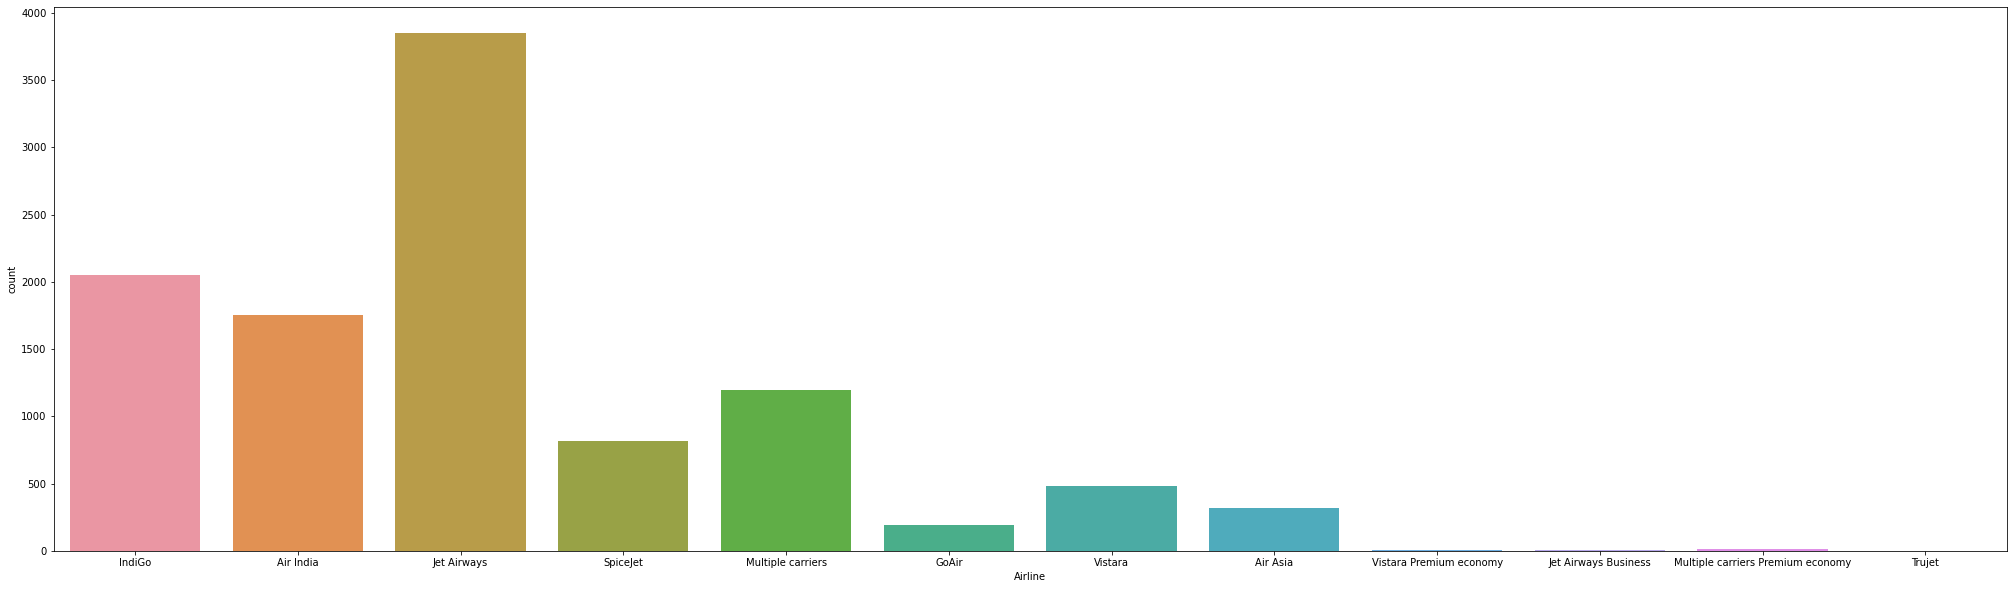

In [78]:
plt.figure(figsize=(35,10))
sns.countplot(train_df['Airline'])
plt.show()

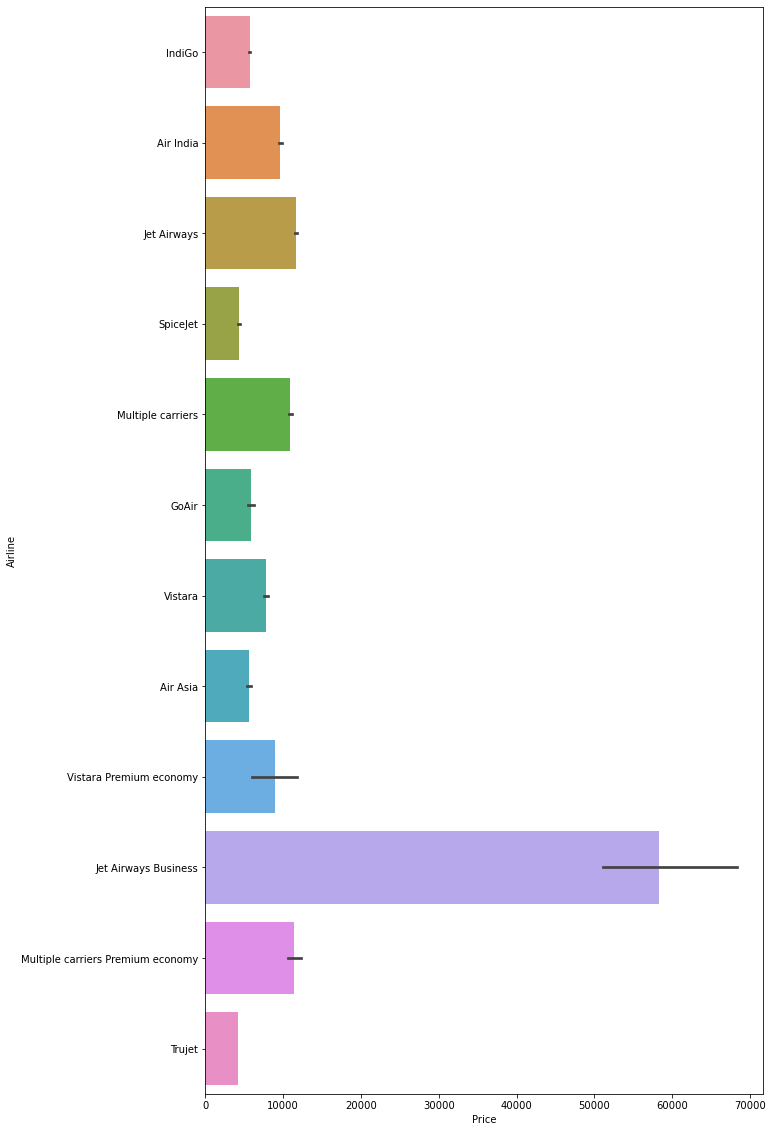

In [79]:
# Airline vs Price
plt.figure(figsize=(10,20))
sns.barplot(y='Airline',x='Price',data=train_df)
plt.show()

we can see here that Jet Airways Business have the highest in price

In [80]:
train_df['Airline']=train_df['Airline'].replace({
'IndiGo':'1','Air India':'2','Jet Airways':'3','SpiceJet':'4','Multiple carriers':'5','GoAir':'6','Vistara':'7','Air Asia':'8','Vistara Premium economy':'9','Jet Airways Business':'10','Multiple carriers Premium economy':'11','Trujet':'12'})
train_df['Airline']=train_df['Airline'].astype('int64')

In [81]:
train_df.Airline.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [82]:
test_df.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [83]:
test_df['Airline']=test_df['Airline'].replace({
    'IndiGo':'1','Air India':'2','Jet Airways':'3','SpiceJet':'4','Multiple carriers':'5',
     'GoAir':'6','Vistara':'7','Air Asia':'8','Vistara Premium economy':'9','Jet Airways Business':'10','Multiple carriers Premium economy':'11'})
test_df['Airline']=test_df['Airline'].astype('int64')

In [84]:
test_df.Airline.unique()

array([ 3,  1,  5,  8,  2,  7,  4,  9,  6, 11, 10], dtype=int64)

In [86]:
train_df.dtypes

Airline              int64
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_mi               int64
Arr_hr               int64
Arr_mi               int64
dtype: object

In [88]:
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [89]:
train_df['Total_Stops']=train_df['Total_Stops'].replace({'non-stop':'0', '2 stops':'2', '1 stop':'1', '3 stops':'3', '4 stops':'4'})


In [90]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi
0,1,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,2,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,3,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25
3,1,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,1,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35


In [91]:
test_df['Total_Stops']=test_df['Total_Stops'].replace({'non-stop':'0', '2 stops':'2', '1 stop':'1', '3 stops':'3', '4 stops':'4'})


In [92]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi
0,3,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,24,3,17,30,4,25
1,1,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,1,5,6,20,10,20
2,3,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,9,6,19,15,19,0
3,5,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,12,5,8,0,21,0
4,8,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,1,3,23,55,2,45


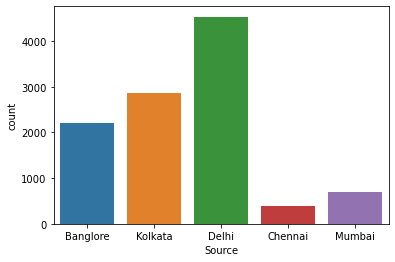

In [93]:
sns.countplot(train_df['Source'])

flights which are operating from delhi as a source is higher in number

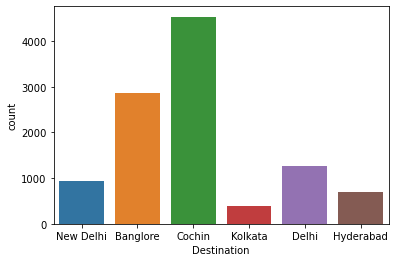

In [94]:
sns.countplot(train_df['Destination'])

flights for cochin as destination are higher in number

In [95]:
train_df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [96]:
train_df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [97]:
train_df['Source']=train_df['Source'].replace({'Banglore':'1', 'Kolkata':'2', 'Delhi':'3', 'Chennai':'4', 'Mumbai':'5'})

train_df['Destination']=train_df['Destination'].replace({'New Delhi':'6', 'Banglore':'1', 'Cochin':'2', 'Kolkata':'5', 'Delhi':'3', 'Hyderabad':'4'})

In [104]:
train_df.Source.unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [105]:
train_df.Destination.unique()

array(['6', '1', '2', '5', '3', '4'], dtype=object)

In [106]:
test_df['Source']=test_df['Source'].replace({'Banglore':'1', 'Kolkata':'2', 'Delhi':'3', 'Chennai':'4', 'Mumbai':'5'})

test_df['Destination']=test_df['Destination'].replace({'New Delhi':'6', 'Banglore':'1', 'Cochin':'2', 'Kolkata':'5', 'Delhi':'3', 'Hyderabad':'4'})

In [107]:
train_df.describe()

,Airline,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.151563,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,1.784673,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,1.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,3.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,12.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


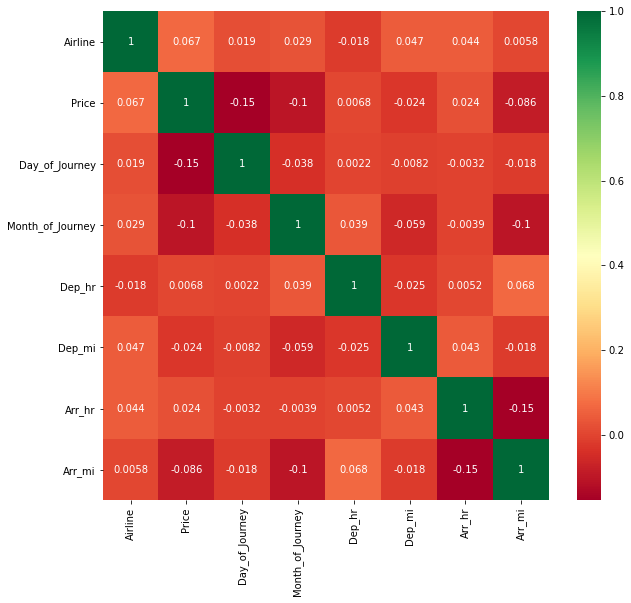

In [108]:
plt.figure(figsize=(10,9))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')

In [109]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi
0,1,1,6,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,2,2,1,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,3,3,2,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25
3,1,2,1,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,1,1,6,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35


In [110]:
train_df.shape,test_df.shape

((10682, 14), (2671, 13))

In [111]:
test_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Day_of_Journey      0
Month_of_Journey    0
Dep_hr              0
Dep_mi              0
Arr_hr              0
Arr_mi              0
dtype: int64

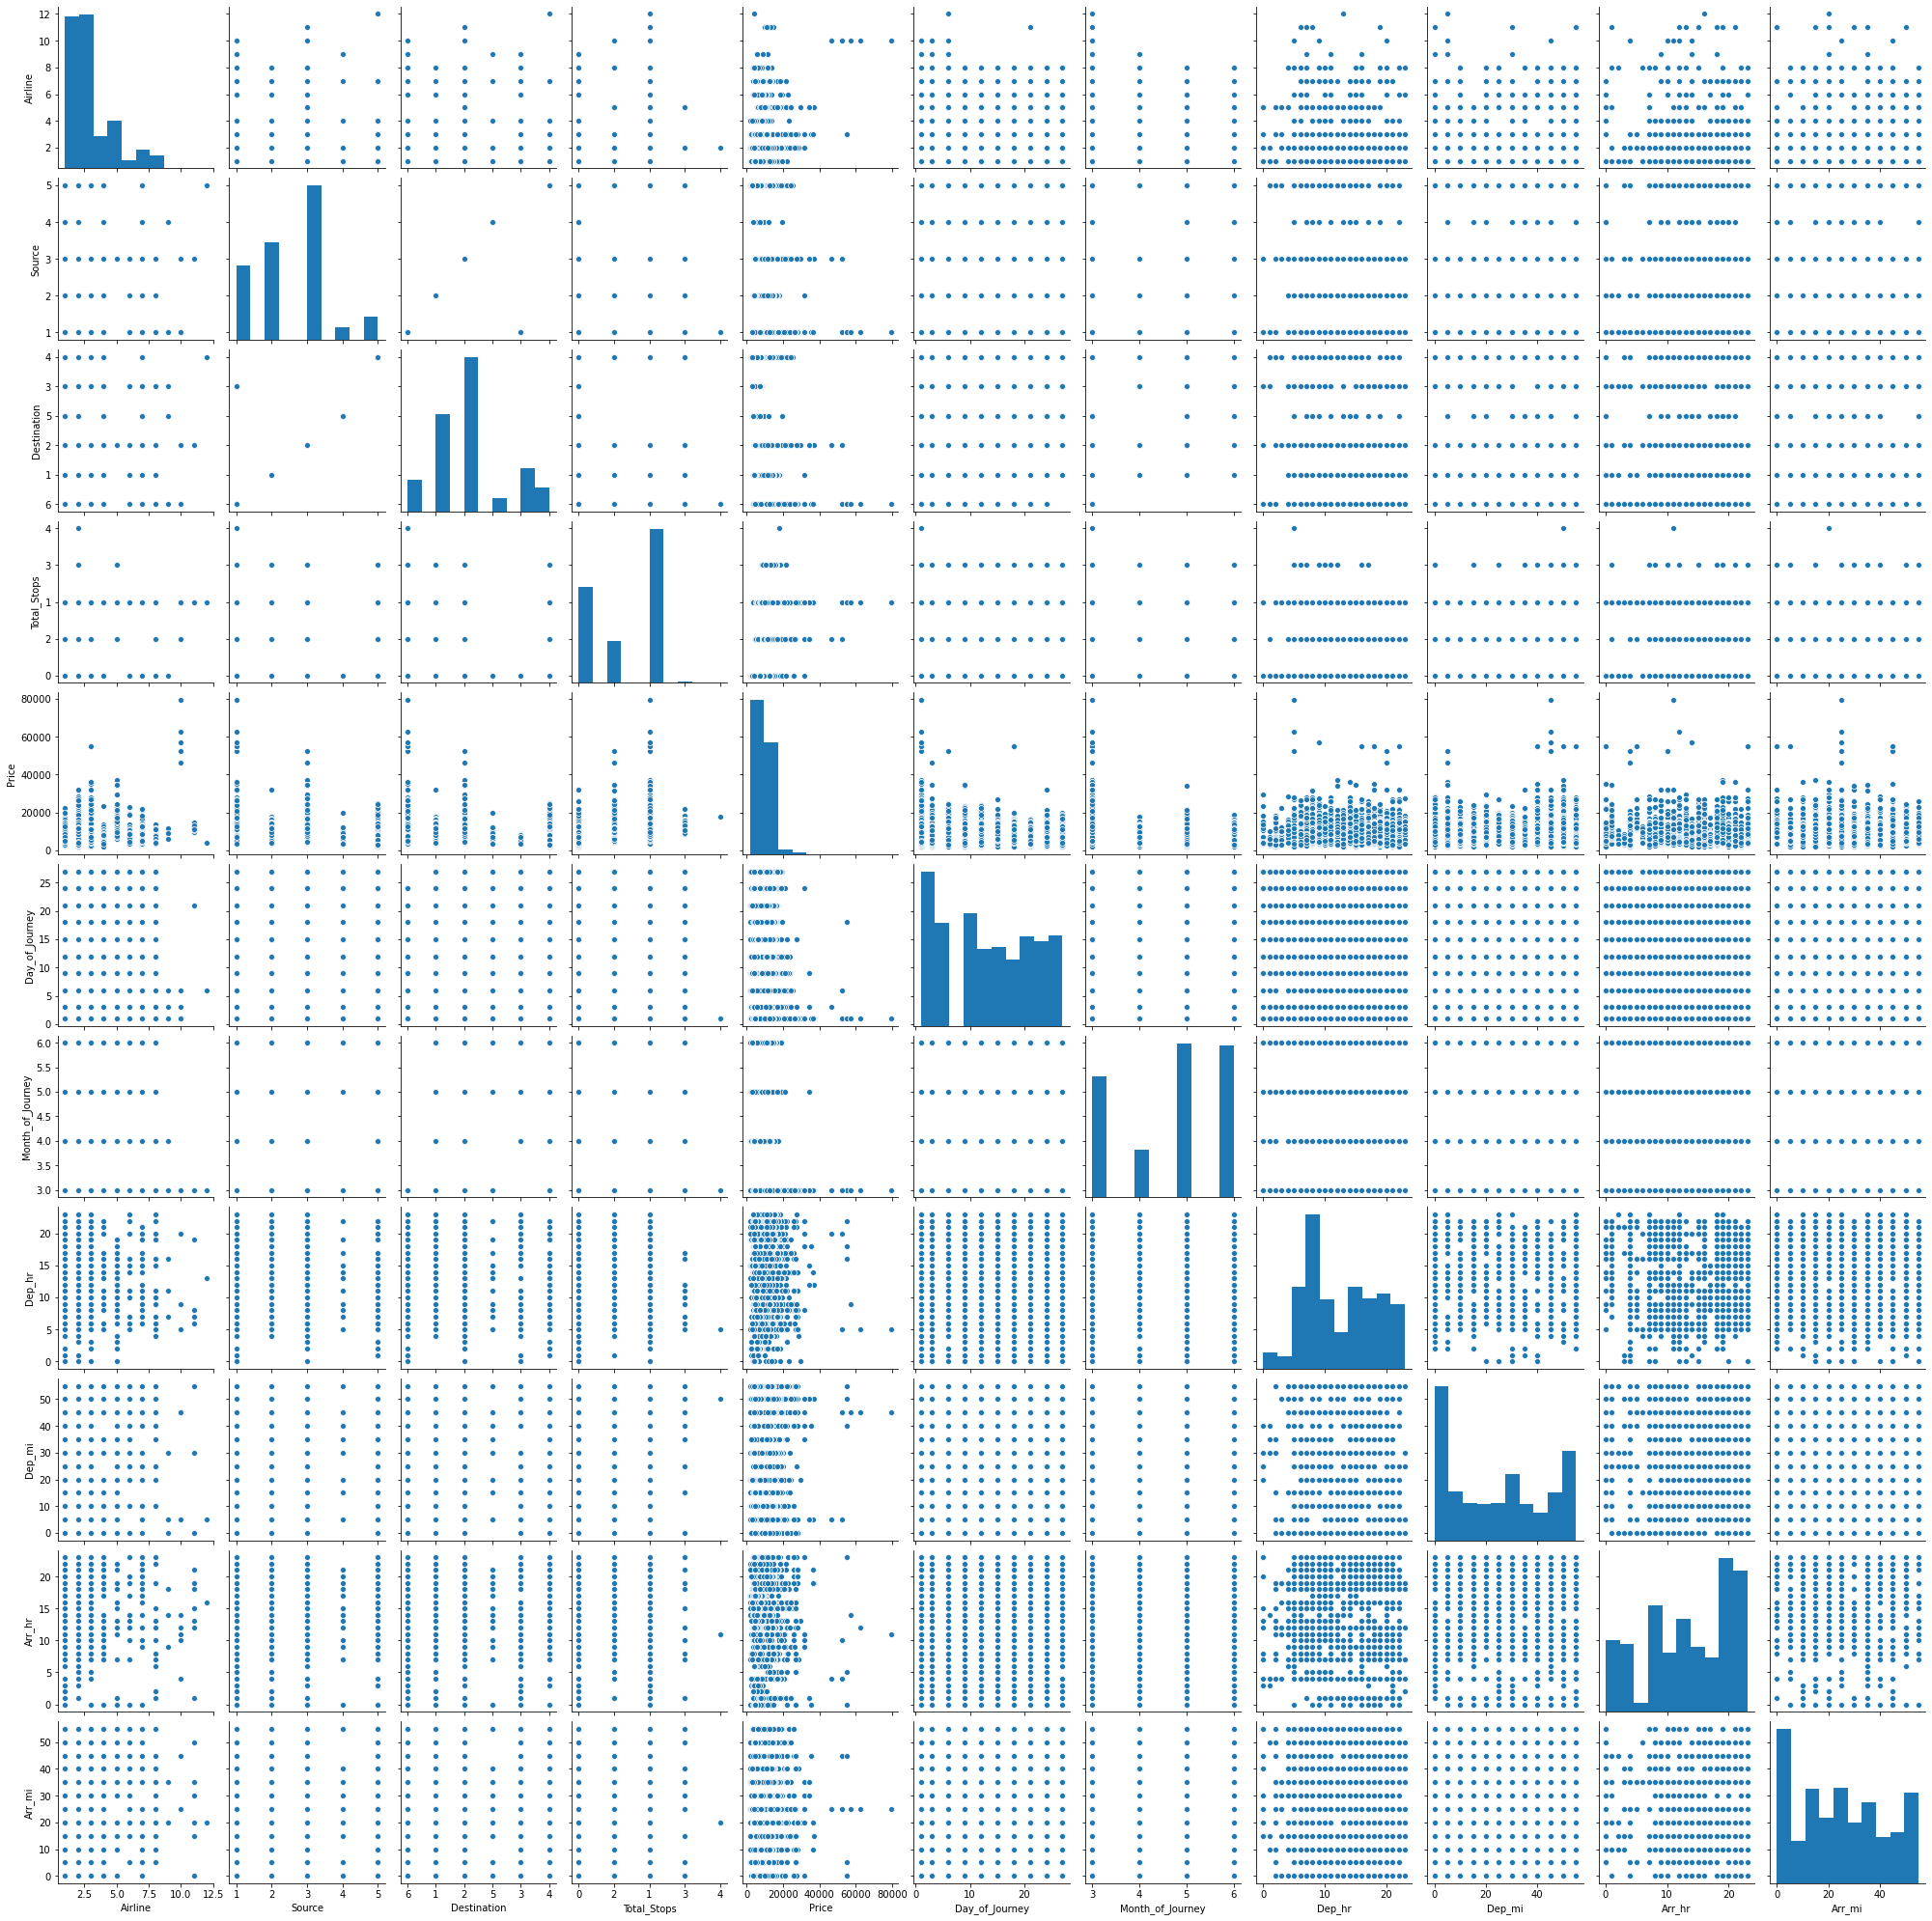

In [112]:
#ploting pairplot

sns.pairplot(train_df)

# Splitting Data

In [124]:
x=train_df.drop(["Duration","Route","Additional_Info","Price"],axis=1)
y=train_df.Price.values

# Train Test Split

In [125]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [127]:
print('Train:',(x_train.shape,y_train.shape))

print('Test:',(x_test.shape,y_test.shape))

Train: ((7477, 10), (7477,))
Test: ((3205, 10), (3205,))


# Model building

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [129]:
lr=LinearRegression()
sv=SVR()
dtreg=DecisionTreeRegressor()
rfreg=RandomForestRegressor()
gdreg=GradientBoostingRegressor()
adreg=AdaBoostRegressor()

In [131]:
model=[lr,sv,dtreg,rfreg,gdreg,adreg]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2 score:',m)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

r2 score: LinearRegression()
0.46007255296966243
11015020.205026997
2431.635539552576
[0.43236524 0.42428778 0.43819202 0.43873699 0.43394179]
0.43350476533038995
0.005211314261759834
r2 score: SVR()
-0.015853489238478513
20724352.44930286
3597.881866944536
[-0.02070913 -0.03693493 -0.01115283 -0.00646277 -0.02420579]
-0.01989308985069087
0.01064382397361996
r2 score: DecisionTreeRegressor()
0.7390392867013531
5323840.352093344
1324.1877327093084
[0.68350373 0.72232981 0.74541846 0.70843598 0.72430599]
0.716798796028909
0.02041829447539027
r2 score: RandomForestRegressor()
0.8392705691692612
3279029.317514208
1133.0486236980908
[0.81446469 0.80781544 0.83629372 0.8144325  0.80506998]
0.8156152675718202
0.010975986934737334
r2 score: GradientBoostingRegressor()
0.772630634787457
4638545.7260882715
1552.9774314477988
[0.73795954 0.73116912 0.77496749 0.75825562 0.76535279]
0.753540914419693
0.01651740392963687
r2 score: AdaBoostRegressor()
0.4639798947480408
10935306.81228598
2556.934512

we can see in here that RandomForest Regressor has the highest r2_score of(83%)

In [136]:
model=rfreg.fit(x_train,y_train)

In [137]:
y_preds=model.predict(x_test)
print('Total Predicted Prices:',len(y_preds))

Total Predicted Prices: 3205


In [138]:
price_preds=pd.DataFrame(y_test,columns=['Actual_Price'])
price_preds['Predicted_Price']=y_preds
price_preds['Error']=price_preds["Actual_Price"]-price_preds['Predicted_Price']
price_preds.head()

,Actual_Price,Predicted_Price,Error
0,16655,16728.490000,-73.490000
1,4959,5620.740000,-661.740000
2,9187,8934.050000,252.950000
3,3858,3702.960000,155.040000
4,12898,15034.060889,-2136.060889


In [139]:
print('Train Score:',model.score(x_train,y_train))

print('Test Score:',model.score(x_test,y_test))

Train Score: 0.9540397363207451
Test Score: 0.8390802585922157


# Hyper Parameter Tuning

# Grid Search Cv

In [141]:
parameters = {'max_depth': np.arange(2,15),'criterion':['mse','rmae'],'max_features':['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'rmae'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [142]:
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test)


In [143]:
r2_score(y_test,GCV_pred)

0.8532098899930858

In [144]:
y_predictions=rfreg.predict(x_test)
print('Total Predicted Prices:',len(y_predictions))

Total Predicted Prices: 3205


In [145]:
print('Train Score:',model.score(x_train,y_train))

print('Test Score:',model.score(x_test,y_test))

Train Score: 0.9540397363207451
Test Score: 0.8390802585922157


In [146]:
test_df.drop(['Route','Additional_Info','Duration'],axis=1,inplace=True)

In [147]:
test_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_mi', 'Arr_hr', 'Arr_mi'],
      dtype='object')

In [149]:
final_preds=rfreg.predict(test_df)

In [150]:
price_df=pd.DataFrame(final_preds,columns=['Price'])
price_df.head()

,Price
0,9579.508333
1,4293.940000
2,10620.200000
3,10679.675000
4,4576.810000


above is shown  the final predicted price of the flight

# Saving The Model

In [151]:
import joblib
joblib.dump(GCV.best_estimator_,'flight_price_Predictions.pkl')

['flight_price_Predictions.pkl']